

Training network with data set size 100
Epoch 0 training complete
Accuracy was 26.43 percent


Training network with data set size 200
Epoch 0 training complete
Accuracy was 36.28 percent


Training network with data set size 500
Epoch 0 training complete
Accuracy was 50.02 percent


Training network with data set size 1000
Epoch 0 training complete
Accuracy was 59.33 percent


Training network with data set size 2000
Epoch 0 training complete
Accuracy was 69.64 percent


Training network with data set size 5000
Epoch 0 training complete
Accuracy was 79.96 percent


Training network with data set size 10000
Epoch 0 training complete
Accuracy was 84.88 percent


Training network with data set size 20000
Epoch 0 training complete
Accuracy was 89.12 percent


Training network with data set size 50000
Epoch 0 training complete
Accuracy was 91.44 percent


Training SVM with data set size 100
Accuracy was 25.07 percent


Training SVM with data set size 200
Accuracy was 48.93 percent


Trai

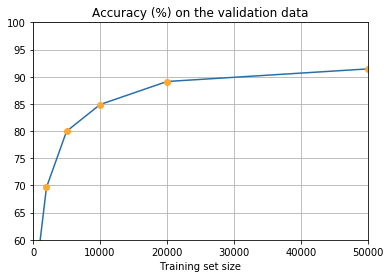

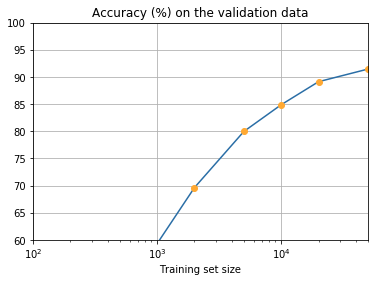

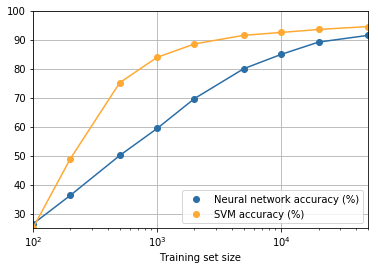

In [5]:
"""
more_data
~~~~~~~~~~~~
Plot graphs to illustrate the performance of MNIST when different size
training sets are used.
"""
# Standard library
import json
import random
import sys

# My library
sys.path.append('../')
import mnist_loader
import network2

# Third-party libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

# The sizes to use for the different training sets
SIZES = [100,200,500,1000,2000,5000,10000,20000,50000]

def main():
    run_networks()
    run_svms()
    make_plots()

def run_networks():
    # Make results more easily reproducible
    random.seed(12345678)
    np.random.seed(12345678)
    training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
    training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
    net = network2.Network([784, 30, 10],cost = network2.CrossEntropyCost())
    accuracies = []
    for size in SIZES:
        print("\n\nTraining network with data set size %s" %size)
        net.large_weight_initializer()
        num_epochs = 1500000 // size # Python 3 use integer division with "//" 
        # For Python 2.7, num_epochs = 1500000 / size
        net.SGD(training_data[:size], num_epochs, 10, 0.5, lmbda = size*0.0001)
        accuracy = net.accuracy(validation_data) / 100.0
        print("Accuracy was %s percent" % accuracy)
        accuracies.append(accuracy)
    f = open("more_data.json", "w")
    json.dump(accuracies,f)
    f.close()

def run_svms():
    svm_training_data, svm_validation_data, svm_test_data = mnist_loader.load_data()
    accuracies = []
    for size in SIZES:
        print("\n\nTraining SVM with data set size %s" %size)
        clf = svm.SVC()
        clf.fit(svm_training_data[0][:size],svm_training_data[1][:size])
        predictions = [int(a) for a in clf.predict(svm_validation_data[0])]
        accuracy = sum(int(a==y) for a,y in zip(predictions, svm_validation_data[1])) / 100.0
        print("Accuracy was %s percent" %accuracy)
        accuracies.append(accuracy)
    f = open("more_data_svm.json","w")
    json.dump(accuracies,f)
    f.close()

def make_plots():
    f = open("more_data.json","r")
    accuracies = json.load(f)
    f.close()
    f = open("more_data_svm.json","r")
    svm_accuracies = json.load(f)
    f.close()
    make_linear_plot(accuracies)
    make_log_plot(accuracies)
    make_combined_plot(accuracies, svm_accuracies)

def make_linear_plot(accuracies):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(SIZES, accuracies, color = '#2A6EA6')
    ax.plot(SIZES, accuracies, "o", color = '#FFA933')
    ax.set_xlim(0,50000)
    ax.set_ylim(60, 100)
    ax.grid(True)
    ax.set_xlabel('Training set size')
    ax.set_title('Accuracy (%) on the validation data')
    plt.show()

def make_log_plot(accuracies):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(SIZES, accuracies, color = '#2A6EA6')
    ax.plot(SIZES, accuracies, "o", color = '#FFA933')
    ax.set_xlim(100, 50000)
    ax.set_ylim(60, 100)
    ax.set_xscale('log')
    ax.grid(True)
    ax.set_xlabel('Training set size')
    ax.set_title('Accuracy (%) on the validation data')
    plt.show()

def make_combined_plot(accuracies, svm_accuracies):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(SIZES,accuracies, color = '#2A6EA6')
    ax.plot(SIZES, accuracies, "o", color = '#2A6EA6',
            label = 'Neural network accuracy (%)')
    ax.plot(SIZES, svm_accuracies, color = '#FFA933')
    ax.plot(SIZES, svm_accuracies, "o", color = '#FFA933',
            label = 'SVM accuracy (%)')
    ax.set_xlim(100, 50000)
    ax.set_ylim(25,100)
    ax.set_xscale('log')
    ax.grid(True)
    ax.set_xlabel('Training set size')
    plt.legend(loc = "lower right")
    plt.show()

if __name__ == "__main__":
    main()
